In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_01 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
df_02 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

# df = pd.concat([df_01, df_02], ignore_index=True)

In [19]:
df = df_01.copy() 

var = ['lpep_pickup_datetime', 'lpep_dropoff_datetime','PULocationID', 'DOLocationID', 'trip_distance', 'VendorID', 'trip_type']

df = df[var].dropna().reset_index(drop=True)

df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60) # time in minutes


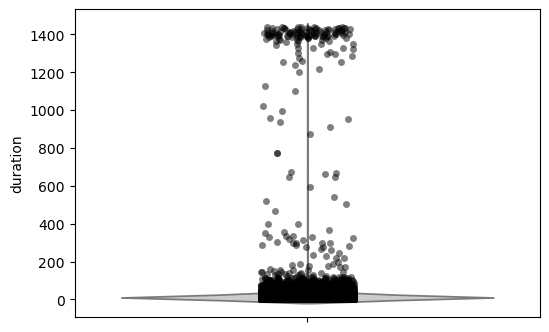

In [20]:
plt.figure(figsize=(6, 4))

# Create the violin plot
sns.violinplot(y='duration', data=df, inner=None, color=".8")
sns.stripplot(y='duration', data=df, jitter=True, color='k', alpha=0.5)

# Show the plot
plt.show()

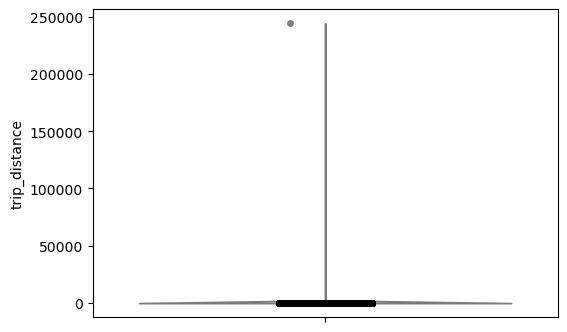

In [21]:
plt.figure(figsize=(6, 4))

# Create the violin plot
sns.violinplot(y='trip_distance', data=df, inner=None, color=".8")
sns.stripplot(y='trip_distance', data=df, jitter=True, color='k', alpha=0.5)

# Show the plot
plt.show()

In [22]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df = df[(df.trip_distance >= 0.001) & (df.trip_distance <= 100)]

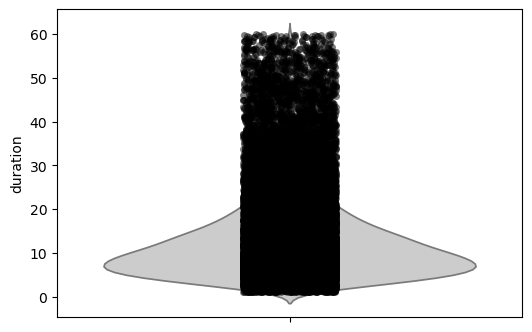

In [23]:
plt.figure(figsize=(6, 4))

# Create the violin plot
sns.violinplot(y='duration', data=df, inner=None, color=".8")
sns.stripplot(y='duration', data=df, jitter=True, color='k', alpha=0.5)

# Show the plot
plt.show()

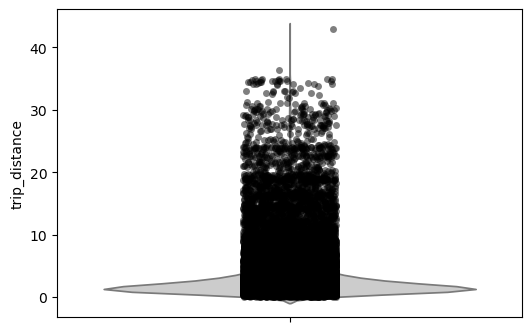

In [9]:
plt.figure(figsize=(6, 4))

# Create the violin plot
sns.violinplot(y='trip_distance', data=df, inner=None, color=".8")
sns.stripplot(y='trip_distance', data=df, jitter=True, color='k', alpha=0.5)

# Show the plot
plt.show()

In [10]:
df.isna().any()

lpep_pickup_datetime     False
lpep_dropoff_datetime    False
PULocationID             False
DOLocationID             False
trip_distance            False
VendorID                 False
trip_type                False
duration                 False
dtype: bool

In [11]:
df = df.reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37054 entries, 0 to 37053
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   37054 non-null  datetime64[us]
 1   lpep_dropoff_datetime  37054 non-null  datetime64[us]
 2   PULocationID           37054 non-null  int64         
 3   DOLocationID           37054 non-null  int64         
 4   trip_distance          37054 non-null  float64       
 5   VendorID               37054 non-null  int64         
 6   trip_type              37054 non-null  float64       
 7   duration               37054 non-null  float64       
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 2.3 MB


In [12]:
table = pa.Table.from_pandas(df)

In [13]:
pq.write_table(table, 'green_tripdata_2021.parquet')